# 卒業研究8：ニューラルネットワークでの学習

### 坂西和也

In [1]:
# データの読み込み
import os

# カレントディレクトリを取得
data_path = os.getcwd()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
data = pd.read_csv(data_path + '/EuF3_data.csv' , sep='\t')

In [3]:
data.head()

,Velocity (mm/s),EuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,373.275017,89.683715,59.446287,38.924525
1,-19.685039,373.239700,90.317998,59.679393,38.652381
2,-19.370079,373.287540,90.972404,59.770151,38.261999
3,-19.055118,373.344075,91.617714,59.701970,37.806983
4,-18.740157,373.326817,92.212957,59.470467,37.346615


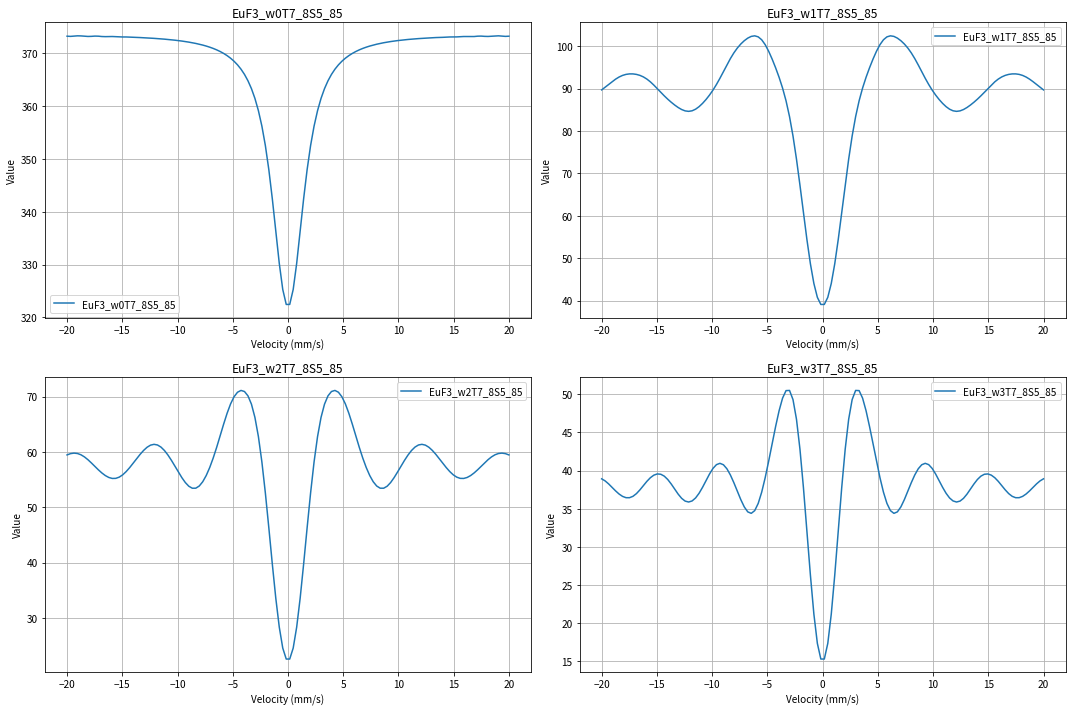

In [4]:
# データの可視化
import pandas as pd
import matplotlib.pyplot as plt

# x軸のデータ
x = data['Velocity (mm/s)']

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 2x2の配置でグラフを表示
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.plot(x, data[column], label=column)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## 前回うまく分類できなかった0.1倍について

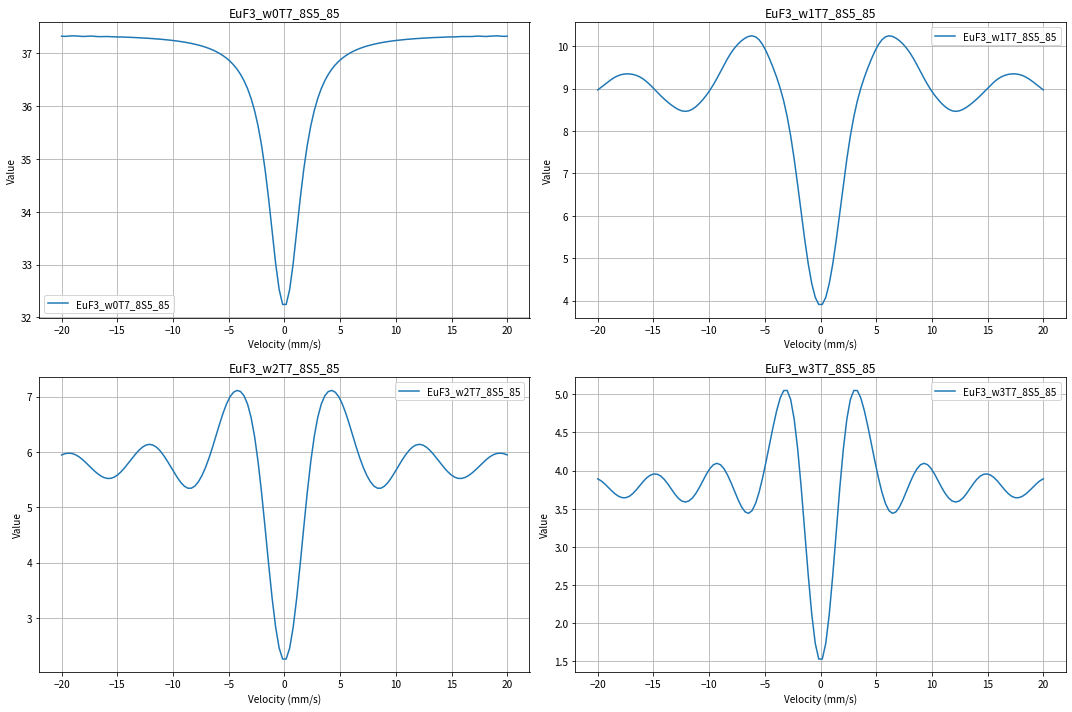

In [5]:
# データを0.1倍する
# 2列目から5列目までのデータの値を10分の1にする
data[data.columns[1:5]] = data[data.columns[1:5]] / 10

# 圧縮後のデータを表示
data

# x軸のデータ
x = data['Velocity (mm/s)']

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 2x2の配置でグラフを表示
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.plot(x, data[column], label=column)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [6]:
# データにノイズを付加
import pandas as pd
import numpy as np

# 0行目のデータを取得
row_at_zero_index = data.iloc[0]

# データをコピーして新しいデータフレームを作成
data_noisy = data.copy()

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 各カラムのデータに正規乱数のノイズを追加
for column in columns_to_plot:
    np.random.seed(0)
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data[column].values
    noise = np.random.normal(0, np.sqrt(variance))
    data_noisy[column] = data[column] + noise

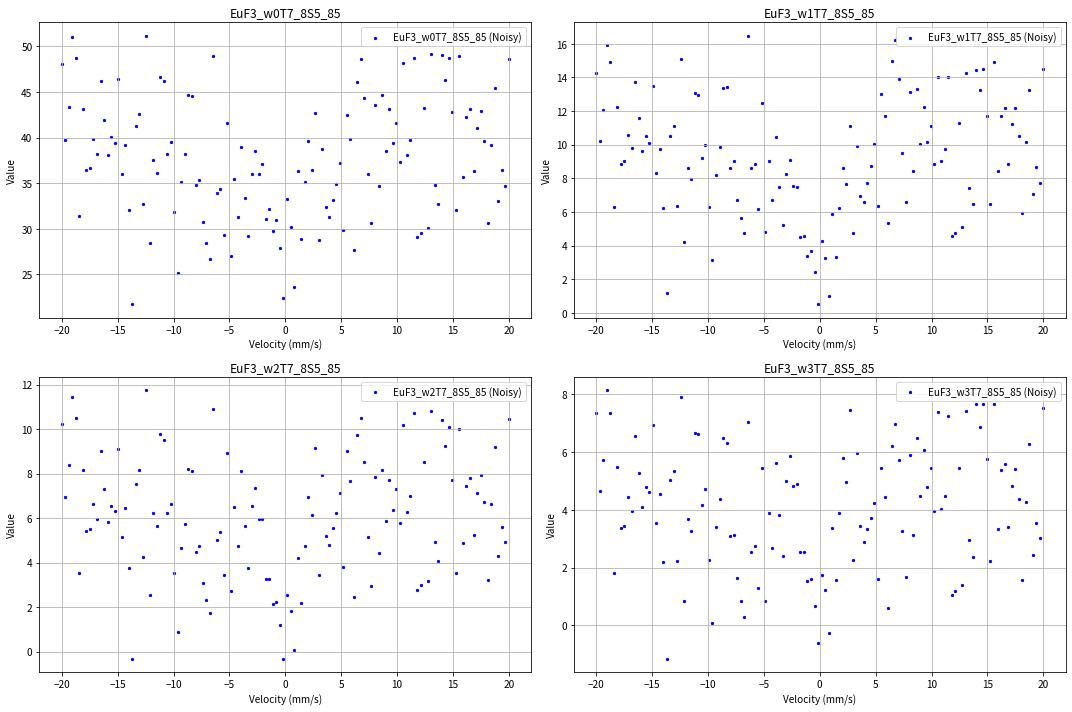

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# x軸のデータ
x = data['Velocity (mm/s)']

# 2x2の配置で散布図をプロット
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.scatter(x, data_noisy[column], label=column + ' (Noisy)', color='blue', s=5)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# ランダムなデータの作成
# 新しいデータフレームを作成
data_random_noise = pd.DataFrame()
data_random_noise['Velocity (mm/s)'] = data['Velocity (mm/s)']

np.random.seed(00)

# 2列目から5列目までのカラムにランダムなノイズを追加
for column in columns_to_plot:
    mean = row_at_zero_index[column]
    variance = row_at_zero_index[column]
    noise = np.random.normal(mean, np.sqrt(variance), size=data[column].shape)
    data_random_noise[column] = noise

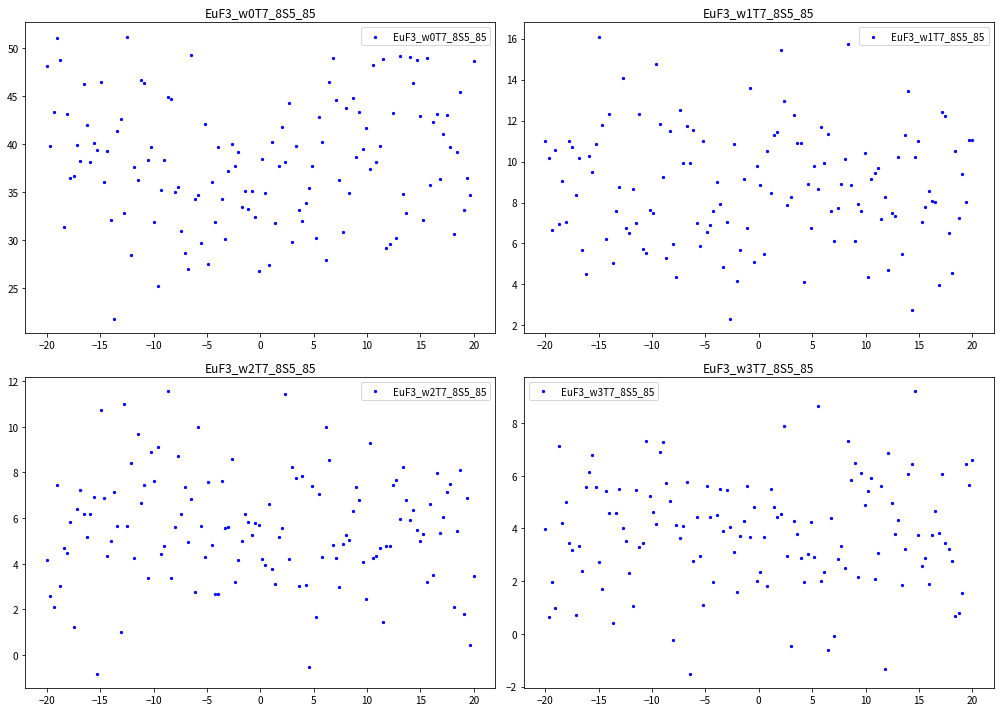

In [9]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(14, 10))

for idx, column in enumerate(data_random_noise.columns[1:]):
    plt.subplot(2, 2, idx+1)
    plt.scatter(data_random_noise['Velocity (mm/s)'], data_random_noise[column], label=column, color='blue', s=5)
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# データセットの作成
# 空のデータフレームを作成
dataset = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w0T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset[column_name] = data['EuF3_w0T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w0T7_8S5_85'], np.sqrt(row_at_zero_index['EuF3_w0T7_8S5_85']), size=data['EuF3_w0T7_8S5_85'].shape)
    dataset[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

In [11]:
# 確認
dataset.head()

,Velocity (mm/s),noisy_0,noisy_1,noisy_2,noisy_3,noisy_4,noisy_5,noisy_6,noisy_7,noisy_8,...,random_noise_15,random_noise_16,random_noise_17,random_noise_18,random_noise_19,random_noise_20,random_noise_21,random_noise_22,random_noise_23,random_noise_24
0,-20.000000,48.105198,47.251641,34.781268,48.255349,37.636415,40.023236,35.422621,47.655978,37.884728,...,33.615614,35.673551,40.362238,38.900118,32.741528,37.488642,40.900873,32.146483,31.256788,30.954192
1,-19.685039,39.768664,33.586545,36.980217,39.990755,40.378340,35.302574,41.777699,34.477403,43.990981,...,36.556856,37.968084,36.482759,31.777022,45.369950,38.917969,44.849644,45.306098,30.830523,32.312382
2,-19.370079,43.308575,34.101769,24.277181,37.918327,31.244023,52.180100,38.659579,37.529276,25.433299,...,33.144814,38.858132,41.284635,35.014990,44.940948,34.913311,42.349003,42.974065,33.429098,41.391293
3,-19.055118,51.026688,30.778367,47.356772,25.948115,41.572425,35.794077,31.840787,39.824409,28.863550,...,43.001599,31.674878,46.632641,34.059369,27.522070,36.079300,32.444517,41.240177,43.813409,48.463066
4,-18.740157,48.743550,42.620364,26.374705,35.637827,34.776840,38.002403,22.138334,32.512324,23.301009,...,26.058905,40.792536,35.896913,42.570007,28.357696,29.558305,39.844992,30.883456,36.365822,28.519970


In [12]:
# DataFrameをCSVファイルに出力
dataset.to_csv(data_path + '/dataset01_.csv', index=False)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# データの読み込み
df = pd.read_csv(data_path + '/dataset01_.csv')

# 1列目を除外
df = df.iloc[:, 1:]

# 入力データとラベルを作成
X = dataset.drop('Velocity (mm/s)', axis=1)
number = 25
random_number = 25
y = [1]*number + [0]*random_number

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# MLPClassifierのインスタンス化
clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=1000,
    random_state=111,
    solver='adam',
    alpha=0.1,
)

# モデルの訓練
clf.fit(X_train, y_train)

# テストデータでの予測
y_pred = clf.predict(X_test)

# 正確さの計算
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.81      0.85      0.80        15
weighted avg       0.88      0.80      0.81        15



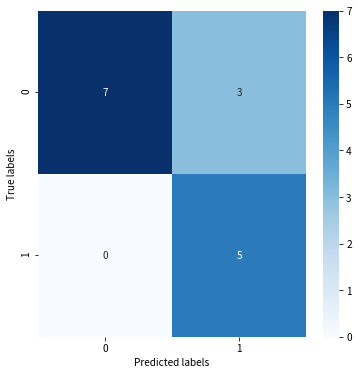

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 分類レポートの表示
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [55]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 1
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 1
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 1
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


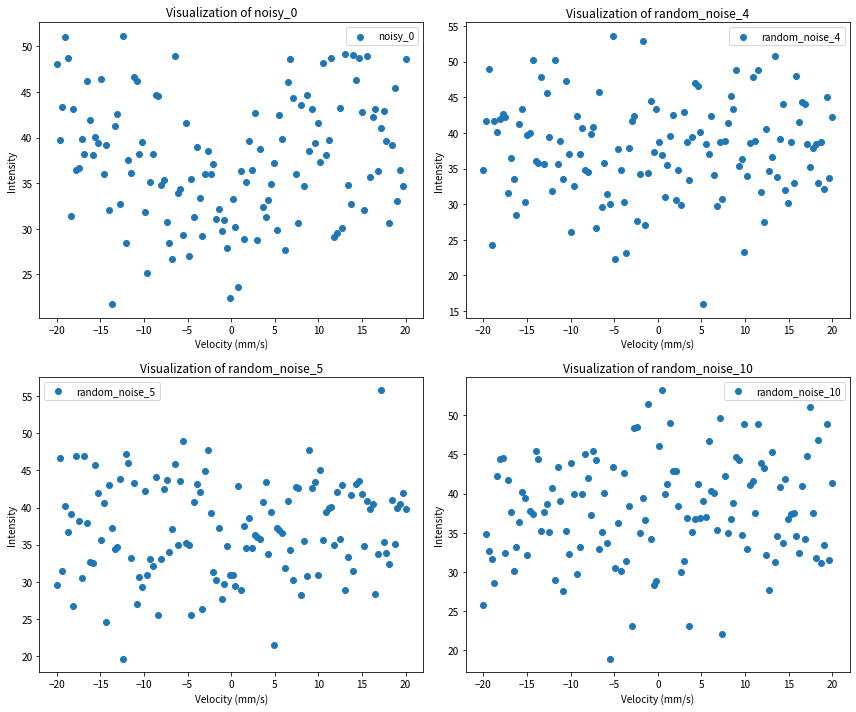

In [56]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['noisy_0', 'random_noise_4', 'random_noise_5', 'random_noise_10']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset['Velocity (mm/s)'], dataset[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()